# 🧠 NeuroSim Python Demo
This notebook demonstrates how to use the `neurosim` Python bindings to simulate spiking neurons and analyze their activity using `numpy` and `matplotlib`.

In [1]:
# Setup Python import path
import sys
import os

# Adjust the path to your build directory where neurosim.so/.pyd exists
build_dir = os.path.expanduser('~/source/NeuroSim/build')
if build_dir not in sys.path:
    sys.path.insert(0, build_dir)

In [ ]:
import neurosim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Create a 5x5 grid of neurons with dt=0.1 ms
sim = neurosim.Simulation(5, 5, 0.1)
sim.connect_random(0.1, 5.0)

In [ ]:
# Apply a constant input current to all neurons
sim.set_input_current(10.0)

In [5]:
# Simulate for 1000 steps (100 ms)
n_steps = 1000
voltages = []

for _ in range(n_steps):
    sim.step()
    v_snapshot = [sim.get_voltage(i) for i in range(sim.neuron_count())]
    voltages.append(v_snapshot)

In [6]:
# Convert voltage data to NumPy array for plotting
voltages = np.array(voltages)  # shape: (timesteps, neurons)
voltages.shape

(1000, 25)

In [ ]:
for _ in range(1000):
    sim.step()

# Retrieve spike events: list of (time, neuron_index)
events = sim.spike_events()
print(f"Total spike events: {len(events)}")

# Load into DataFrame
df = pd.DataFrame(events, columns=["time_ms", "neuron"])
df.head()

plt.figure(figsize=(10, 4))
plt.scatter(df["time_ms"], df["neuron"], s=10, color="black", alpha=0.6)
plt.title("Spike Raster Plot")
plt.xlabel("Time (ms)")
plt.ylabel("Neuron Index")
plt.grid(True)
plt.show()

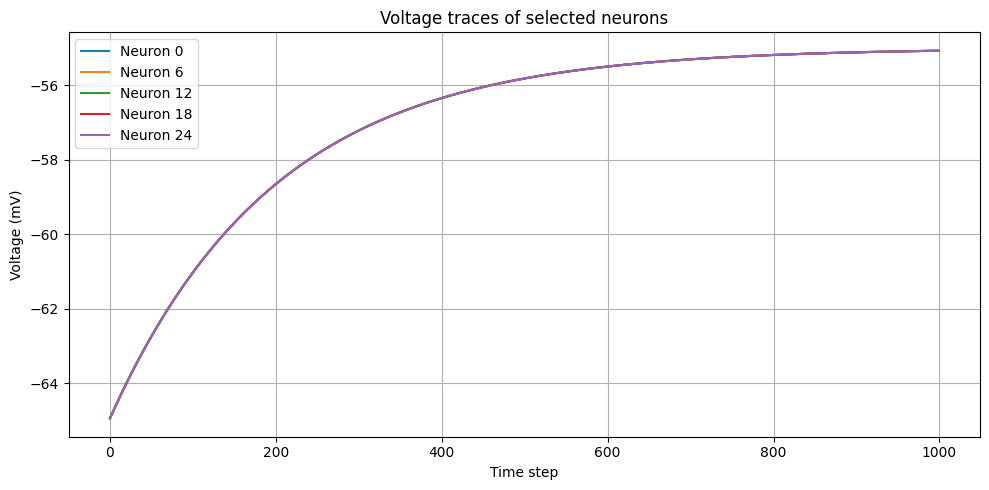

In [7]:
# Plot voltage traces of a few selected neurons
plt.figure(figsize=(10, 5))
for neuron_id in [0, 6, 12, 18, 24]:
    plt.plot(voltages[:, neuron_id], label=f"Neuron {neuron_id}")
plt.xlabel("Time step")
plt.ylabel("Voltage (mV)")
plt.title("Voltage traces of selected neurons")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

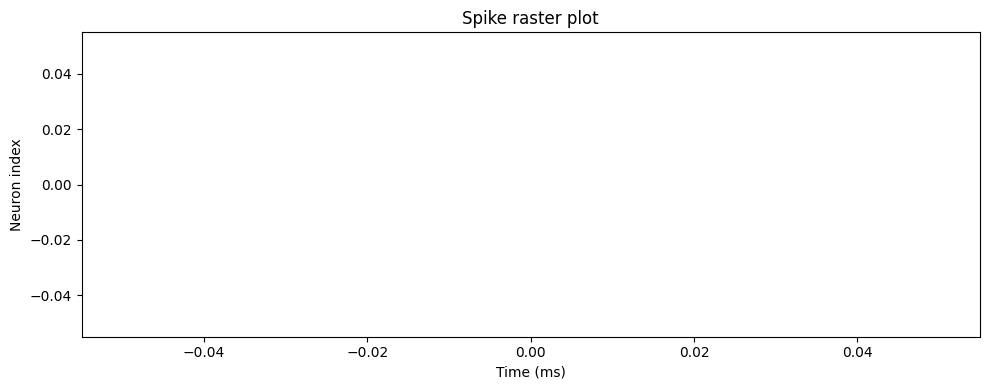

In [8]:
# Raster plot of spikes (neuron index vs. time)
events = sim.spike_events()

times = [t for (t, i) in events]
indices = [i for (t, i) in events]

plt.figure(figsize=(10, 4))
plt.scatter(times, indices, s=2, color='black')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron index")
plt.title("Spike raster plot")
plt.tight_layout()
plt.show()

In [9]:
# Compute firing rates over the last 100 ms
rates = np.array([sim.get_spike_rate(i, window_ms=100) for i in range(sim.neuron_count())])
rate_map = rates.reshape((sim.ny(), sim.nx()))

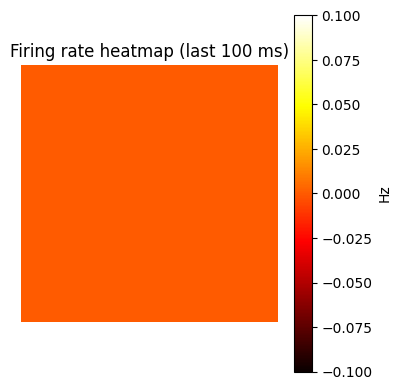

In [10]:
# Plot firing rate heatmap
plt.figure(figsize=(4, 4))
plt.imshow(rate_map, cmap='hot', interpolation='nearest')
plt.colorbar(label="Hz")
plt.title("Firing rate heatmap (last 100 ms)")
plt.axis("off")
plt.tight_layout()
plt.show()